# EAS 503 Final Project Group 2

In [ ]:
from IPython.display import Image
image = Image(filename='freedom-tower.jpg')
image

In [1]:
import pymysql
db = pymysql.connect(host="localhost",    # your host, usually localhost
                     user="root",         # your username
                     passwd="root",       # your password
                     db="Project")

In [2]:
from IPython.display import HTML, display

sql = '''SELECT DATES,TIME,BOROUGH,ZIP_CODE,LATITUDE,LONGITUDE,ON_STREET_NAME,
NUMBER_OF_PERSONS_KILLED,NUMBER_OF_PERSONS_INJURED,CONTRIBUTING_FACTOR_VEHICLE_1  
FROM ACCIDENT_DATA WHERE BOROUGH IS NOT NULL and BOROUGH <> '' AND 
NUMBER_OF_PERSONS_KILLED <> 0 AND NUMBER_OF_PERSONS_INJURED <> 0 AND CONTRIBUTING_FACTOR_VEHICLE_1 <> 'Unspecified' LIMIT 5'''
cur = db.cursor()
cur.execute(sql)
Date = []
Time = []
Borough = []
Zip_code = []
Latitude = []
Longitude = []
On_Street_Name = []
Number_of_People_Killed = []
Number_of_People_Injured = []
Contributing_Vehicle_1 = []


for row in cur.fetchall():
    Date.append(row[0])
    Time.append(row[1])
    Borough.append(row[2])
    Zip_code.append(row[3])
    Latitude.append(row[4])
    Longitude.append(row[5])
    On_Street_Name.append(row[6])
    Number_of_People_Killed.append(row[7])
    Number_of_People_Injured.append(row[8])
    Contributing_Vehicle_1.append(row[9])
    
data = [['Date','Time','Borough','Zip code','Latitude','Longitude','On Street Name','Number of People Killed','Number of People Injured','Contributing Vehicle 1'],
        [Date[0],Time[0],Borough[0],Zip_code[0],Latitude[0],Longitude[0],On_Street_Name[0],Number_of_People_Killed[0],Number_of_People_Injured[0],Contributing_Vehicle_1[0]],
       [Date[1],Time[1],Borough[1],Zip_code[1],Latitude[1],Longitude[1],On_Street_Name[1],Number_of_People_Killed[1],Number_of_People_Injured[1],Contributing_Vehicle_1[1]],
       [Date[2],Time[2],Borough[2],Zip_code[2],Latitude[2],Longitude[2],On_Street_Name[2],Number_of_People_Killed[2],Number_of_People_Injured[2],Contributing_Vehicle_1[2]],
       [Date[3],Time[3],Borough[3],Zip_code[3],Latitude[3],Longitude[3],On_Street_Name[3],Number_of_People_Killed[3],Number_of_People_Injured[3],Contributing_Vehicle_1[3]],
       [Date[4],Time[4],Borough[4],Zip_code[4],Latitude[4],Longitude[4],On_Street_Name[4],Number_of_People_Killed[4],Number_of_People_Injured[4],Contributing_Vehicle_1[4]]]

display(HTML(
    '<table><tr>{}</tr></table>'.format(
        '</tr><tr>'.join(
            '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in data)
        )
 ))

Date,Time,Borough,Zip code,Latitude,Longitude,On Street Name,Number of People Killed,Number of People Injured,Contributing Vehicle 1
2013-01-20 00:00:00,2:00:00,MANHATTAN,10010,40.7407,-73.9818,EAST 26 STREET,1,1,Driver Inattention/Distraction
2013-11-11 00:00:00,12:50:00,MANHATTAN,10029,40.7904,-73.9498,PARK AVENUE,1,3,Failure to Yield Right-of-Way
2013-06-04 00:00:00,8:15:00,MANHATTAN,10025,40.7947,-73.9699,WEST 97 STREET,1,1,Aggressive Driving/Road Rage
2014-01-10 00:00:00,20:48:00,MANHATTAN,10025,40.7959,-73.9727,WEST 97 STREET,1,1,Failure to Yield Right-of-Way
2013-02-06 00:00:00,14:15:00,MANHATTAN,10031,40.8201,-73.9551,WEST 135 STREET,1,6,Failure to Yield Right-of-Way


#### Importing all required packages 

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.patches as mpatches
import gmplot

##    Creating Scatter Plot of Data

In [79]:
querystr = "SELECT LATITUDE, LONGITUDE FROM ACCIDENT_DATA;"
cur = db.cursor()
cur.execute(querystr)

1048573

In [80]:
lat = []
lon = []
for row in cur.fetchall():
    lat.append(row[0])
    lon.append(row[1])

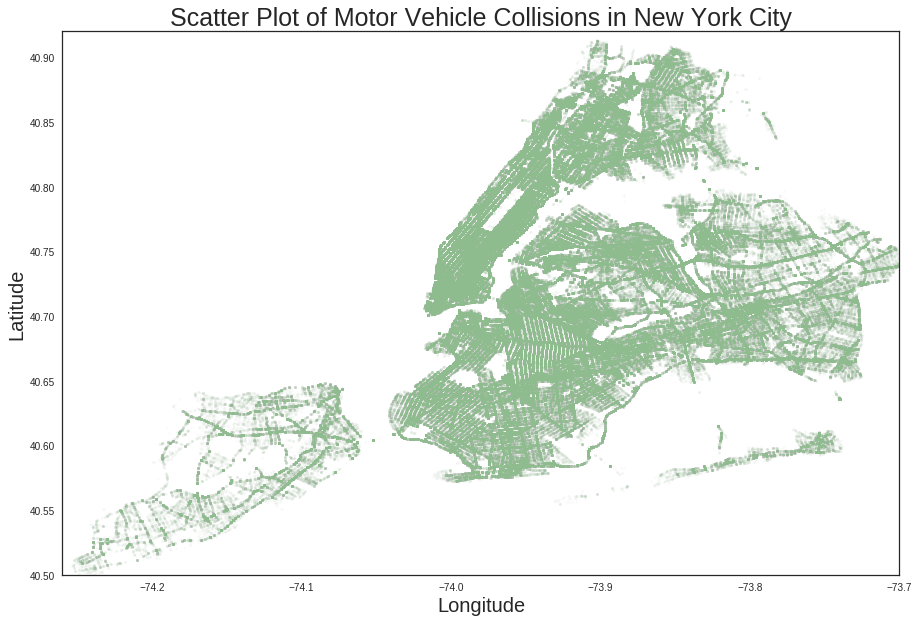

In [82]:
sns.set_style("white")
plt.figure(figsize=(15,10))

plt.scatter(lon, lat, alpha=0.05, s=4, color='darkseagreen')

plt.title('Scatter Plot of Motor Vehicle Collisions in New York City', size=25)
plt.xlim((-74.26,-73.7))
plt.ylim((40.5,40.92))
plt.xlabel('Longitude',size=20)
plt.ylabel('Latitude',size=20)

plt.show()

## Scatter plot with information about city boroughs

In [8]:
querystr = "SELECT LATITUDE,LONGITUDE,BOROUGH FROM ACCIDENT_DATA WHERE BOROUGH IS NOT NULL and BOROUGH <> ''"
cur = db.cursor()
cur.execute(querystr)

lat1 = [] 
lon1 = []
lat2 = []
lon2 = []
lat3 = []
lon3 = []
lat4 = []
lon4 = []
lat5 = []
lon5 = []
for row in cur.fetchall():
    if row[2] == 'MANHATTAN':
        lat1.append(row[0])
        lon1.append(row[1])
    elif row[2] == 'BROOKLYN':
        lat2.append(row[0])
        lon2.append(row[1])
    elif row[2] == 'BRONX':
        lat3.append(row[0])
        lon3.append(row[1])
    elif row[2] == 'QUEENS':
        lat4.append(row[0])
        lon4.append(row[1])
    else:
        lat5.append(row[0])
        lon5.append(row[1])

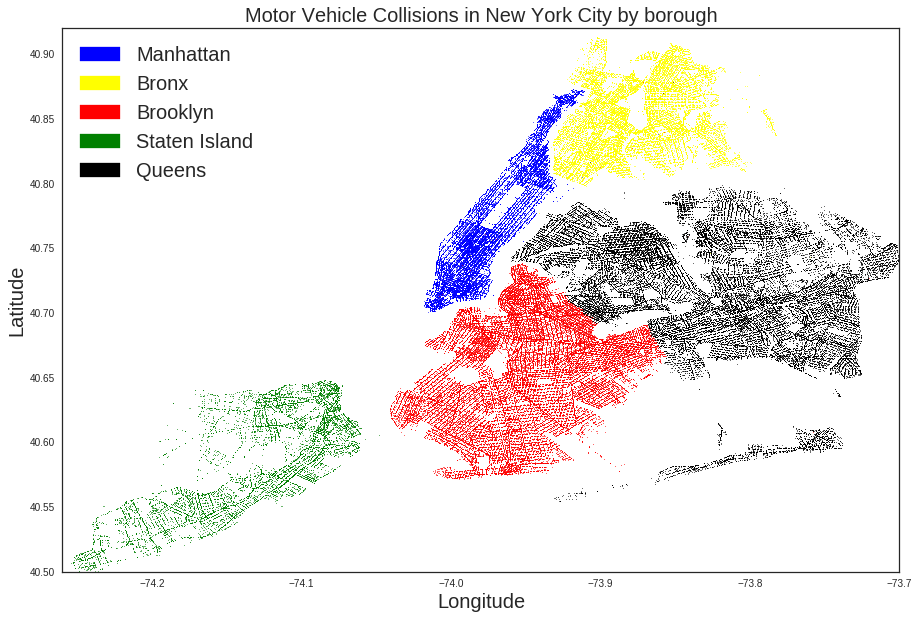

In [9]:
# 1 - Manhattan, 2-Brooklyn, 3-Bronx, 4-Queens, 5-Staten Island
plt.figure(figsize=(15,10))

plt.scatter(lon1, lat1, s=1, color='blue', marker ='.')
plt.scatter(lon3, lat3, s=1, color='yellow', marker ='.')
plt.scatter(lon2, lat2, color='red', s=1, marker ='.')
plt.scatter(lon5, lat5, s=1, color='green', marker ='.')
plt.scatter(lon4, lat4, s=1, color='black', marker ='.')

blue_patch = mpatches.Patch(label='Manhattan', color='blue')
yellow_patch = mpatches.Patch(color='yellow', label='Bronx')
red_patch = mpatches.Patch(color='red', label='Brooklyn')
green_patch = mpatches.Patch(color='green', label='Staten Island')
black_patch = mpatches.Patch(color='black', label='Queens')
plt.legend([blue_patch, yellow_patch, red_patch, green_patch, black_patch],
           ('Manhattan', 'Bronx', 'Brooklyn', 'Staten Island', 'Queens'), 
           loc='upper left', prop={'size':20})

plt.title('Motor Vehicle Collisions in New York City by borough', size=20)
plt.xlim((-74.26,-73.7))
plt.ylim((40.5,40.92))
plt.xlabel('Longitude',size=20)
plt.ylabel('Latitude',size=20)
plt.show()

## Number of Accidents 

In [144]:
querystr = "SELECT BOROUGH,count(BOROUGH) FROM ACCIDENT_DATA WHERE BOROUGH IS NOT NULL and BOROUGH <> '' group by BOROUGH "
cur = db.cursor()
cur.execute(querystr)

5

In [145]:
borough = []
count = []
for row in cur.fetchall():
    borough.append(row[0])
    count.append(row[1])

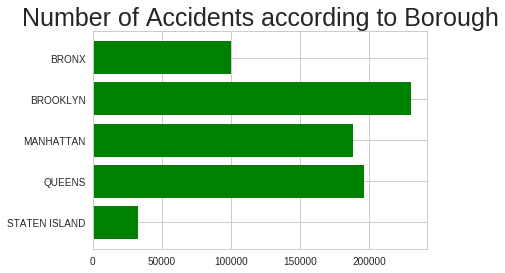

In [146]:
fig, ax = plt.subplots()
a = [1,2,3,4,5]
y_pos = np.arange(len(borough))
error = np.random.rand(len(borough))

ax.barh(y_pos, count, xerr=error, align='center',
        color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(borough)
ax.invert_yaxis()

plt.title('Number of Accidents according to Borough', size = 25)
plt.show()

## Persons killed according to Borough

In [139]:
querystr = "SELECT BOROUGH,SUM(NUMBER_OF_PERSONS_KILLED) FROM ACCIDENT_DATA WHERE BOROUGH IS NOT NULL and BOROUGH <> '' group by BOROUGH "
cur = db.cursor()
cur.execute(querystr)

5

In [140]:
borough = []
count_killed = []
for row in cur.fetchall():
    borough.append(row[0])
    count_killed.append(row[1])

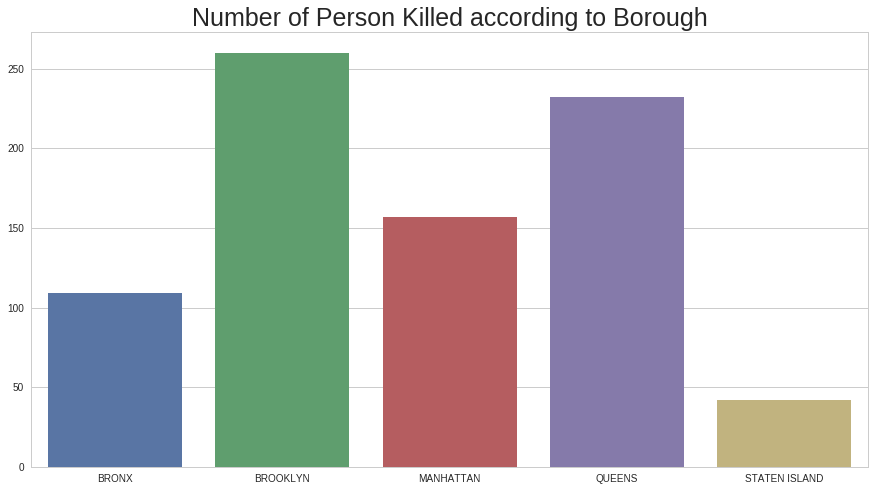

In [141]:
%matplotlib inline

sns.set_style("whitegrid")
a = [1,2,3,4,5]
fig=plt.figure(figsize=[15,8])
ax = sns.barplot(x=borough, y=count_killed)
# plt.xlabel("Borough", size = 20)
# font = {'family' : 'normal',
#         'weight' : 'bold',
#         'size'   : 32}
# plt.rc('font', **font)
# plt.rcParams.update({'font.size': 22})
plt.title("Number of Person Killed according to Borough", size = 25)
plt.show()

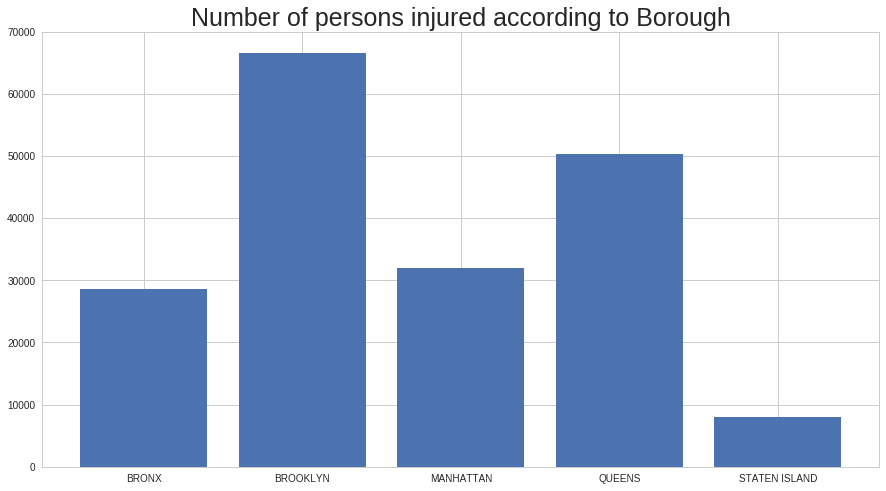

In [142]:
querystr = "SELECT BOROUGH,SUM(NUMBER_OF_PERSONS_INJURED) FROM ACCIDENT_DATA WHERE BOROUGH IS NOT NULL and BOROUGH <> '' group by BOROUGH "
cur = db.cursor()
cur.execute(querystr)

borough = []
count_killed = []
for row in cur.fetchall():
    borough.append(row[0])
    count_killed.append(row[1])

%matplotlib inline

a = [1,2,3,4,5]
fig=plt.figure(figsize=[15,8])
plt.bar(a, count_killed, align='center')
plt.xticks(a, borough)
plt.title('Number of persons injured according to Borough', size = 25)
plt.show()

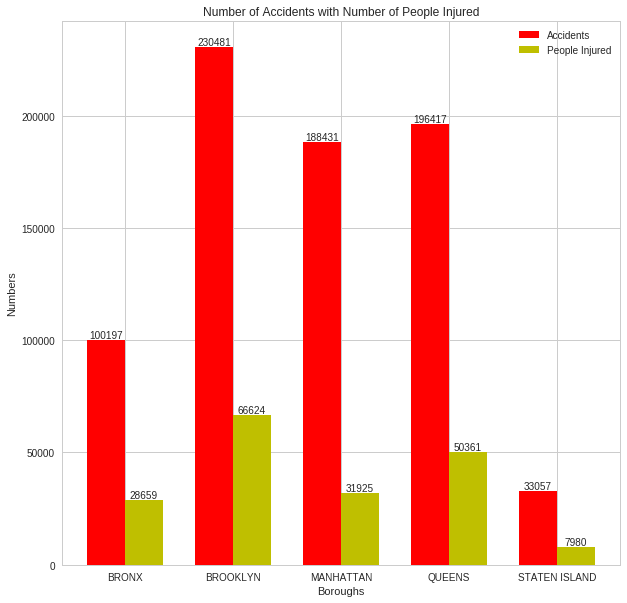

In [147]:
N = 5
width = 0.35
ind = np.arange(N)  
men_std = (2, 3, 4, 1, 2)

fig, ax = plt.subplots(figsize=(10,10))

#fig.SubplotParams.update(left=5, bottom=5, right=5, top=5, wspace=5, hspace=5)
rects1 = ax.bar(ind, count, width, color='r', yerr=men_std)


women_std = (3, 5, 2, 3, 3)
rects2 = ax.bar(ind + width, count_killed, width, color='y', yerr=women_std)

# add some text for labels, title and axes ticks
ax.set_ylabel('Numbers')
ax.set_xlabel('Boroughs')
ax.set_title('Number of Accidents with Number of People Injured')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels((borough))

ax.legend((rects1[0], rects2[0]), ('Accidents', 'People Injured'))


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

In [83]:
# Category of Vehicle responsible for maximum Collisions
querystr = '''select count(*) as count, VEHICLE_TYPE_CODE_1 from ACCIDENT_DATA 
where VEHICLE_TYPE_CODE_1 <> "" AND VEHICLE_TYPE_CODE_1 <> "Unspecified" 
group by VEHICLE_TYPE_CODE_1 
order by count DESC 
LIMIT 5;'''
cur = db.cursor()
cur.execute(querystr)

vehicle_type = []
count = []
for row in cur.fetchall():
    vehicle_type.append(row[1])
    count.append(row[0])


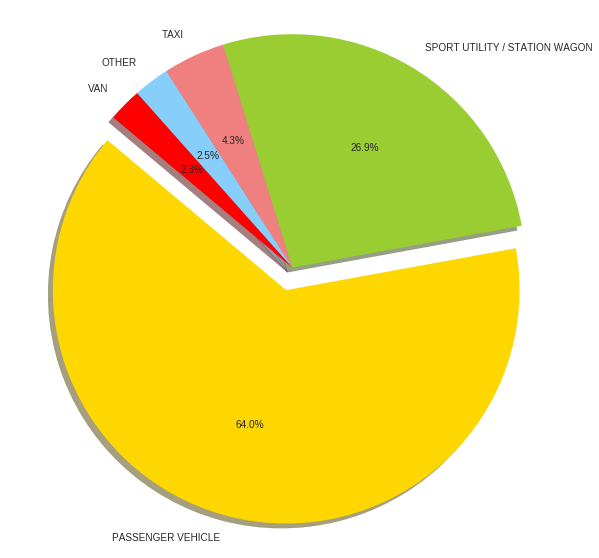

In [84]:
labels = ['PASSENGER VEHICLE', 'SPORT UTILITY / STATION WAGON', 'TAXI', 'OTHER', 'VAN']
sizes = count
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','red']
explode = (0.1, 0, 0, 0,0)  # explode 1st slice
fig=plt.figure(figsize=[10,10]) 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

In [77]:
querystr = '''SELECT LATITUDE, LONGITUDE FROM ACCIDENT_DATA WHERE BOROUGH IS NOT NULL and BOROUGH <> '' and NUMBER_OF_PERSONS_KILLED <> 0; '''
querystr1 = '''SELECT LATITUDE, LONGITUDE FROM ACCIDENT_DATA WHERE BOROUGH IS NOT NULL and BOROUGH <> '' and NUMBER_OF_PERSONS_KILLED = 0 and NUMBER_OF_PERSONS_INJURED <> 0;'''
querystr2 = '''SELECT LATITUDE, LONGITUDE FROM ACCIDENT_DATA WHERE BOROUGH IS NOT NULL and BOROUGH <> '' and NUMBER_OF_PERSONS_KILLED = 0 and NUMBER_OF_PERSONS_INJURED = 0;'''
cur = db.cursor()
cur1 = db.cursor()
cur2 = db.cursor()
cur.execute(querystr)
cur1.execute(querystr1)
cur2.execute(querystr2)
killed_lat = []
killed_lon = []
injured_lat = []
injured_lon = []
non_lat = []
non_lon = []
for row in cur.fetchall():
    killed_lat.append(row[0])
    killed_lon.append(row[1])

for row in cur1.fetchall():
    injured_lat.append(row[0])
    injured_lon.append(row[1])
    
for row in cur2.fetchall():
    non_lat.append(row[0])
    non_lon.append(row[1])    

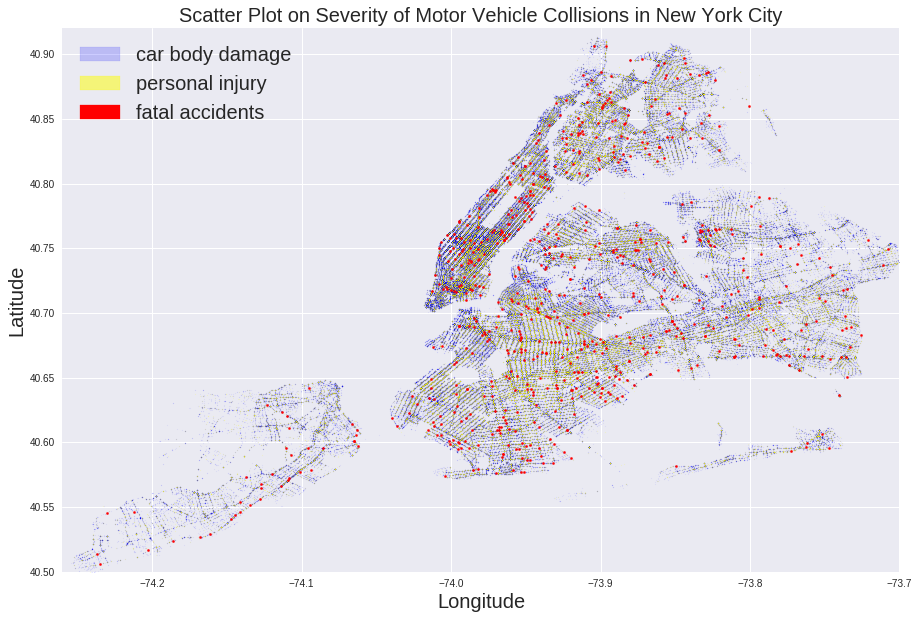

In [78]:
plt.figure(figsize=(15,10))
plt.scatter(non_lon, non_lat, alpha=0.04, s=1, color='blue')
plt.scatter(injured_lon, injured_lat, alpha=0.1, s=1, color='yellow')
plt.scatter(killed_lon, killed_lat, color='red', s=5)

blue_patch = mpatches.Patch( label='car body damage', alpha=0.2, color='blue')
yellow_patch = mpatches.Patch(color='yellow', label='personal injury', alpha=0.5)
red_patch = mpatches.Patch(color='red', label='lethal accidents')
plt.legend([blue_patch, yellow_patch, red_patch],('car body damage', 'personal injury', 'fatal accidents'), 
           loc='upper left', prop={'size':20})

plt.title('Scatter Plot on Severity of Motor Vehicle Collisions in New York City', size=20)
plt.xlim((-74.26,-73.7))
plt.ylim((40.5,40.92))
plt.xlabel('Longitude',size=20)
plt.ylabel('Latitude',size=20)
plt.show()## Obtaining Streets with most collisions 

In [44]:
querystr = '''SELECT CONTRIBUTING_FACTOR_VEHICLE_1,COUNT(*) as count
FROM ACCIDENT_DATA
WHERE CONTRIBUTING_FACTOR_VEHICLE_1 IS NOT NULL and CONTRIBUTING_FACTOR_VEHICLE_1 <> "" and CONTRIBUTING_FACTOR_VEHICLE_1 <>"Unspecified"
group by CONTRIBUTING_FACTOR_VEHICLE_1 
order by count DESC LIMIT 10 ;'''
cur = db.cursor()
cur.execute(querystr)

borough = []
count_c_factor = []
for row in cur.fetchall():
    borough.append(row[0])
    count_c_factor.append(row[1])


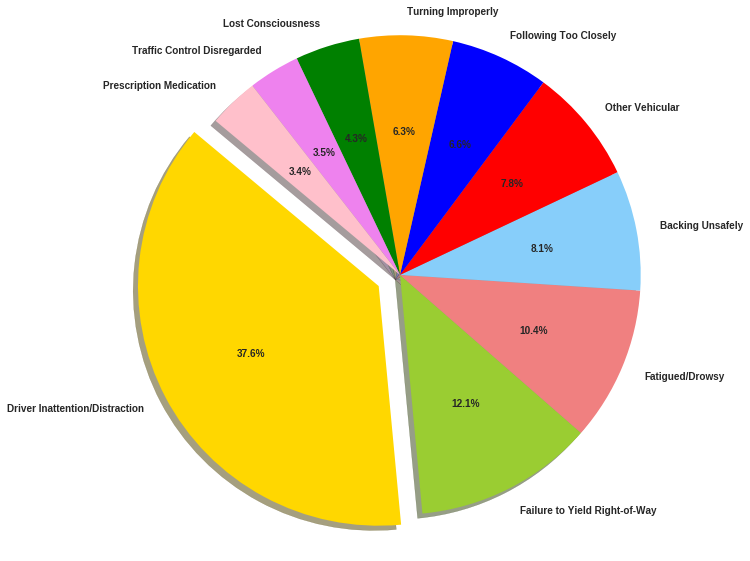

In [45]:
labels =['Driver Inattention/Distraction', 'Failure to Yield Right-of-Way', 'Fatigued/Drowsy', 'Backing Unsafely', 'Other Vehicular', 'Following Too Closely', 'Turning Improperly', 'Lost Consciousness', 'Traffic Control Disregarded', 'Prescription Medication'] 
sizes = count_c_factor
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','red','blue','orange','green','violet','pink']
explode = (0.1, 0, 0, 0,0,0,0,0,0,0)  # explode 1st slice
fig=plt.figure(figsize=[10,10]) 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

In [50]:
# Category of Vehicle responsible for maximum Collisions
querystr = '''select count(*) as count, VEHICLE_TYPE_CODE_2 from ACCIDENT_DATA 
where VEHICLE_TYPE_CODE_2 <> "" AND VEHICLE_TYPE_CODE_2 <> "Unspecified" AND VEHICLE_TYPE_CODE_1='PASSENGER VEHICLE'
group by VEHICLE_TYPE_CODE_2 
order by count DESC 
LIMIT 5;'''
cur = db.cursor()
cur.execute(querystr)

vehicle_type = []
count = []
for row in cur.fetchall():
    vehicle_type.append(row[1])
    count.append(row[0])


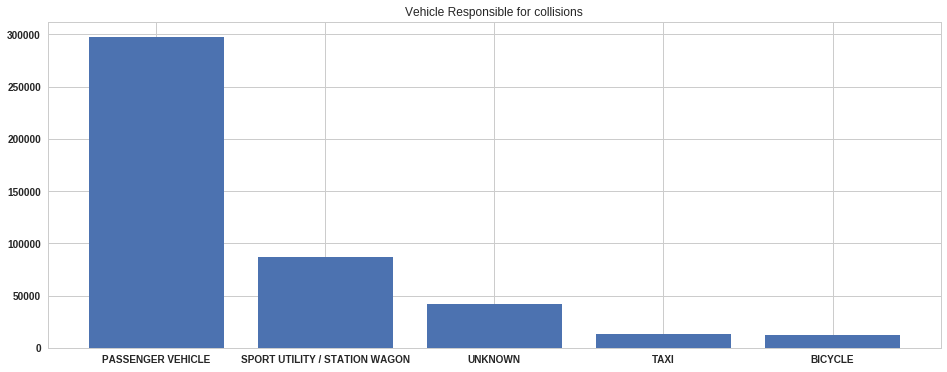

In [51]:
%matplotlib inline

a = [1,2,3,4,5]
fig=plt.figure(figsize=[16,6])
# b = df.value_counts()
plt.bar(a, count, align='center')
plt.xticks(a, vehicle_type)
plt.title('Vehicle Responsible for collisions')
plt.show()

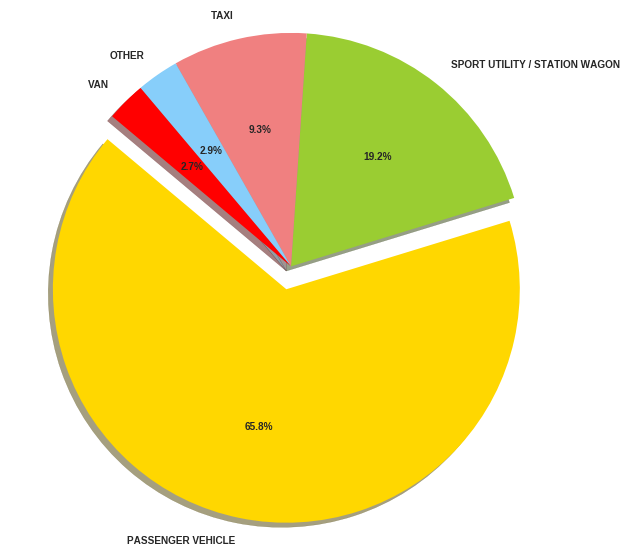

In [52]:
labels = ['PASSENGER VEHICLE', 'SPORT UTILITY / STATION WAGON', 'TAXI', 'OTHER', 'VAN']
sizes = count
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','red']
explode = (0.1, 0, 0, 0,0)  # explode 1st slice
fig=plt.figure(figsize=[10,10]) 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

## Obtaining Streets with most collisions 

In [22]:
# Category of Vehicle responsible for maximum Collisions
querystr = '''select count(*) as count, ON_STREET_NAME from ACCIDENT_DATA
where ON_STREET_NAME IS NOT NULL AND ON_STREET_NAME<>" "
group by ON_STREET_NAME 
order by count desc limit 10;
'''
cur = db.cursor()
cur.execute(querystr)

vehicle_type = []
count = []
for row in cur.fetchall():
    vehicle_type.append(row[1])
    count.append(row[0])

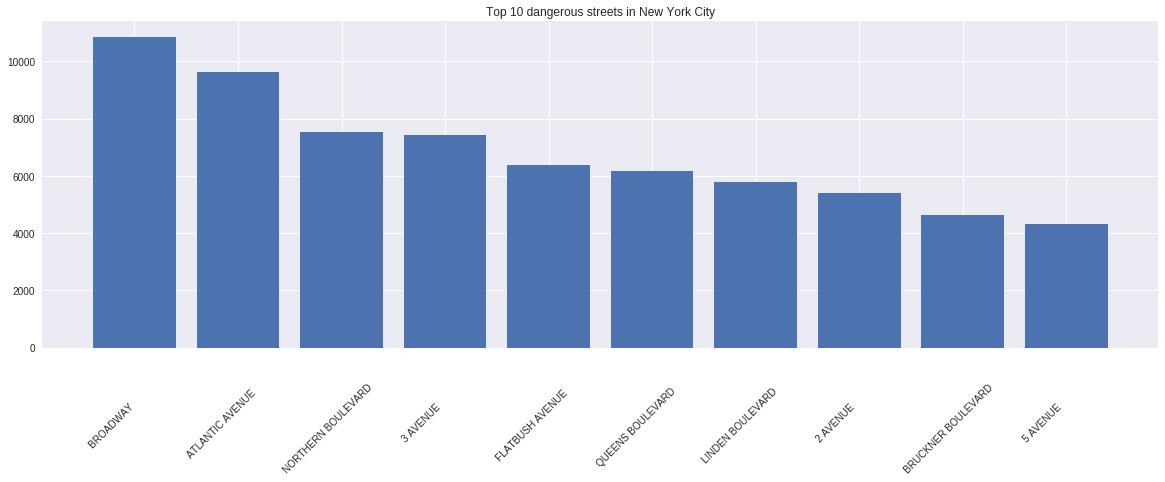

In [23]:
%matplotlib inline

a = [1,2,3,4,5,6,7,8,9,10]
fig=plt.figure(figsize=[20,6])
# b = df.value_counts()
plt.bar(a, count, align='center')
plt.xticks(a, vehicle_type, rotation = 45)
plt.title('Top 10 dangerous streets in New York City')
plt.show()

In [85]:
querystr = '''select ON_STREET_NAME,LATITUDE, LONGITUDE from ACCIDENT_DATA 
where ((ON_STREET_NAME = "BROADWAY" AND BOROUGH = "MANHATTAN") or (ON_STREET_NAME = "ATLANTIC AVENUE" AND BOROUGH = "BROOKLYN") 
or (ON_STREET_NAME = "NORTHERN BOULEVARD" AND BOROUGH = "QUEENS") or (ON_STREET_NAME = "3 AVENUE" AND BOROUGH = "MANHATTAN") 
or (ON_STREET_NAME = "3 AVENUE" AND BOROUGH = "BRONX") or (ON_STREET_NAME = "FLATBUSH AVENUE" AND BOROUGH = "BROOKLYN") 
or (ON_STREET_NAME = "QUEENS BOULEVARD" AND BOROUGH = "QUEENS") or (ON_STREET_NAME = "LINDEN BOULEVARD") 
or (ON_STREET_NAME = "2 AVENUE" AND BOROUGH = "MANHATTAN") or (ON_STREET_NAME = "BRUCKNER BOULEVARD" AND BOROUGH = "BRONX") 
or (ON_STREET_NAME = "5 AVENUE" AND BOROUGH = "MANHATTAN")) AND LATITUDE <> 0 AND LONGITUDE <> 0;'''
cur = db.cursor()
cur.execute(querystr)
lat1 = [] 
lon1 = []
lat2 = []
lon2 = []
lat3 = []
lon3 = []
lat4 = []
lon4 = []
lat5 = []
lon5 = []
lat6 = [] 
lon6 = []
lat7 = []
lon7 = []
lat8 = []
lon8 = []
lat9 = []
lon9 = []
lat10 = []
lon10 = []
for row in cur.fetchall():
    if row[0].strip() == 'BROADWAY':
        lat1.append(row[1])
        lon1.append(row[2])
    elif row[0].strip() == 'ATLANTIC AVENUE':
        lat2.append(row[1])
        lon2.append(row[2])
    elif row[0].strip() == 'NORTHERN BOULEVARD':
        lat3.append(row[1])
        lon3.append(row[2])
    elif row[0].strip() == '3 AVENUE':
        lat4.append(row[1])
        lon4.append(row[2])
    elif row[0].strip() == 'FLATBUSH AVENUE':
        lat5.append(row[1])
        lon5.append(row[2])
    elif row[0].strip() == 'QUEENS BOULEVARD':
        lat6.append(row[1])
        lon6.append(row[2])
    elif row[0].strip() == 'LINDEN BOULEVARD':
        lat7.append(row[1])
        lon7.append(row[2])
    elif row[0].strip() == '2 AVENUE':
        lat8.append(row[1])
        lon8.append(row[2])
    elif row[0].strip() == 'BRUCKNER BOULEVARD':
        lat9.append(row[1])
        lon9.append(row[2])
    elif row[0].strip() == '5 AVENUE':
        lat10.append(row[1])
        lon10.append(row[2])## Obtaining Streets with most collisions 

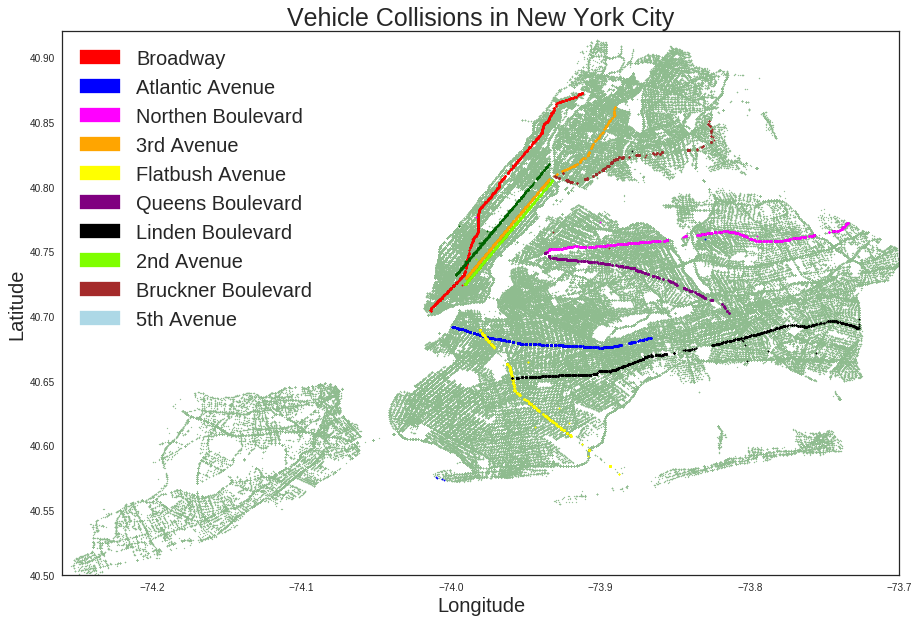

In [89]:
plt.figure(figsize=(15,10))

plt.scatter(lon, lat, s=1, color='darkseagreen')
plt.scatter(lon1, lat1, s=2, color='red')
plt.scatter(lon2, lat2, color='blue', s=2)
plt.scatter(lon3, lat3, s=2, color='magenta')
plt.scatter(lon4, lat4, color='orange', s=2)
plt.scatter(lon5, lat5, s=2, color='yellow')
plt.scatter(lon6, lat6, color='purple', s=2)
plt.scatter(lon7, lat7, s=2, color='black')
plt.scatter(lon8, lat8, color='chartreuse', s=2)
plt.scatter(lon9, lat9, s=2, color='brown')
plt.scatter(lon10, lat10, color='darkgreen', s=2)


a_patch = mpatches.Patch(color='red', label='Broadway')
b_patch = mpatches.Patch(color='blue', label='Atlantic Avenue')
c_patch = mpatches.Patch(color='magenta', label='Northen Boulevard')
d_patch = mpatches.Patch(color='orange', label='3rd Avenue')
e_patch = mpatches.Patch(color='yellow', label='Flatbush Avenue')
f_patch = mpatches.Patch(color='purple', label='Queens Boulevard')
g_patch = mpatches.Patch(color='black', label='Linden Boulevard')
h_patch = mpatches.Patch(color='chartreuse', label='2nd Avenue')
i_patch = mpatches.Patch(color='brown', label='Bruckner Boulevard')
j_patch = mpatches.Patch(color='lightblue', label='5th Avenue')


plt.legend([a_patch, b_patch, c_patch, d_patch, e_patch, f_patch, g_patch, h_patch, i_patch, j_patch],
           ('Broadway', 'Atlantic Avenue', 'Northen Boulevard', '3rd Avenue', 'Flatbush Avenue', 'Queens Boulevard',
            'Linden Boulevard', '2nd Avenue', 'Bruckner Boulevard', '5th Avenue'), 
           loc='upper left', prop={'size':20})

plt.title('Vehicle Collisions in New York City', size=25)
plt.xlim((-74.26,-73.7))
plt.ylim((40.5,40.92))
plt.xlabel('Longitude',size=20)
plt.ylabel('Latitude',size=20)
plt.show()

In [108]:
import folium
from folium import plugins
m = folium.Map([40.65, -73.8886], zoom_start=11)

lat1.sort()
lon1.sort()
lat2.sort()
lon2.sort()
lat3.sort()
lon3.sort()
lat4.sort()
lon4.sort()
lat5.sort()
lon5.sort()
lat6.sort()
lon6.sort()
lat7.sort()
lon7.sort()
lat8.sort()
lon8.sort()
lat9.sort()
lon9.sort()
lat10.sort()
lon10.sort()
len7 = int(len(lat1)/10)

line1 = folium.PolyLine(
    [[lat1[len7],lon1[len7]],[lat1[2*len7],lon1[2*len7]],[lat1[3*len7],lon1[3*len7]],[lat1[4*len7],lon1[4*len7]],
    [lat1[5*len7],lon1[5*len7]],[lat1[6*len7],lon1[6*len7]],[lat1[7*len7],lon1[7*len7]],[lat1[8*len7],lon1[8*len7]],
    [lat1[9*len7],lon1[9*len7]]],
    weight=10,
    color='orange',
    opacity=0.8
).add_to(m)

len7 = int(len(lat2)/10)

line2 = folium.PolyLine(
    [[lat2[len7],lon2[len7]],[lat2[2*len7],lon2[2*len7]],[lat2[3*len7],lon2[3*len7]],[lat2[4*len7],lon2[4*len7]],
    [lat2[5*len7],lon2[5*len7]],[lat2[6*len7],lon2[6*len7]],[lat2[7*len7],lon2[7*len7]],[lat2[8*len7],lon2[8*len7]],
    [lat2[9*len7],lon2[9*len7]]],
    color='blue'
).add_to(m)

len7 = int(len(lat3)/10)

line3 = folium.PolyLine(
    [[lat3[len7],lon3[len7]],[lat3[2*len7],lon3[2*len7]],[lat3[3*len7],lon3[3*len7]],[lat3[4*len7],lon3[4*len7]],
    [lat3[5*len7],lon3[5*len7]],[lat3[6*len7],lon3[6*len7]],[lat3[7*len7],lon3[7*len7]],[lat3[8*len7],lon3[8*len7]],
    [lat3[9*len7],lon3[9*len7]]],
    color='magenta'
).add_to(m)

len7 = int(len(lat4)/10)

line4 = folium.PolyLine(
    [[lat4[len7],lon4[len7]],[lat4[2*len7],lon4[2*len7]],[lat4[3*len7],lon4[3*len7]],[lat4[4*len7],lon4[4*len7]],
    [lat4[5*len7],lon4[5*len7]],[lat4[6*len7],lon4[6*len7]],[lat4[7*len7],lon4[7*len7]],[lat4[8*len7],lon4[8*len7]],
    [lat4[9*len7],lon4[9*len7]]],
    color='orange'
).add_to(m)

len7 = int(len(lat5)/10)

line5 = folium.PolyLine(
    [[lat5[len7],lon5[len7]],[lat5[2*len7],lon5[2*len7]],[lat5[3*len7],lon5[3*len7]],[lat5[4*len7],lon5[4*len7]],
    [lat5[5*len7],lon5[5*len7]],[lat5[6*len7],lon5[6*len7]],[lat5[7*len7],lon5[7*len7]],[lat5[8*len7],lon5[8*len7]],
    [lat5[9*len7],lon5[9*len7]]],
    color='yellow'
).add_to(m)

len7 = int(len(lat6)/10)

line6 = folium.PolyLine(
    [[lat6[len7],lon6[len7]],[lat6[2*len7],lon6[2*len7]],[lat6[3*len7],lon6[3*len7]],[lat6[4*len7],lon6[4*len7]],
    [lat6[5*len7],lon6[5*len7]],[lat6[6*len7],lon6[6*len7]],[lat6[7*len7],lon6[7*len7]],[lat6[8*len7],lon6[8*len7]],
    [lat6[9*len7],lon6[9*len7]]],
    color='purple'
).add_to(m)

len7 = int(len(lat7)/10)

line7 = folium.PolyLine(
    [[lat7[len7],lon7[len7]],[lat7[2*len7],lon7[2*len7]],[lat7[3*len7],lon7[3*len7]],[lat7[4*len7],lon7[4*len7]],
    [lat7[5*len7],lon7[5*len7]],[lat7[6*len7],lon7[6*len7]],[lat7[7*len7],lon7[7*len7]],[lat7[8*len7],lon7[8*len7]],
    [lat7[9*len7],lon7[9*len7]]],
    color='black'
).add_to(m)

len7 = int(len(lat8)/10)

line8 = folium.PolyLine(
    [[lat8[len7],lon8[len7]],[lat8[2*len7],lon8[2*len7]],[lat8[3*len7],lon8[3*len7]],[lat8[4*len7],lon8[4*len7]],
    [lat8[5*len7],lon8[5*len7]],[lat8[6*len7],lon8[6*len7]],[lat8[7*len7],lon8[7*len7]],[lat8[8*len7],lon8[8*len7]],
    [lat8[9*len7],lon8[9*len7]]],
    color='chartreuse'
).add_to(m)

len7 = int(len(lat9)/10)

line9 = folium.PolyLine(
    [[lat9[len7],lon9[len7]],[lat9[2*len7],lon9[2*len7]],[lat9[3*len7],lon9[3*len7]],[lat9[4*len7],lon9[4*len7]],
    [lat9[5*len7],lon9[5*len7]],[lat9[6*len7],lon9[6*len7]],[lat9[7*len7],lon9[7*len7]],[lat9[8*len7],lon9[8*len7]],
    [lat9[9*len7],lon9[9*len7]]],
    color='brown'
).add_to(m)

len7 = int(len(lat10)/10)

line10 = folium.PolyLine(
    [[lat10[len7],lon10[len7]],[lat10[2*len7],lon10[2*len7]],[lat10[3*len7],lon10[3*len7]],[lat10[4*len7],lon10[4*len7]],
    [lat10[5*len7],lon10[5*len7]],[lat10[6*len7],lon10[6*len7]],[lat10[7*len7],lon10[7*len7]],[lat10[8*len7],lon10[8*len7]],
    [lat10[9*len7],lon10[9*len7]]],
    color='lightgreen',
    weight = 15
).add_to(m)

m

In [116]:
querystr = '''select latitude,longitude,sum(number_of_persons_killed) as np,count(*) as count from ACCIDENT_DATA where latitude <> 0 and longitude <> 0 group by latitude,longitude order by np desc limit 5;'''
cur = db.cursor()
cur.execute(querystr)
for row in cur.fetchall():
    print(row)

(40.729, -74.0107, Decimal('8'), 16)
(40.7304, -73.9139, Decimal('4'), 124)
(40.7793, -73.9009, Decimal('4'), 14)
(40.7445, -73.7661, Decimal('3'), 8)
(40.77, -73.9158, Decimal('3'), 51)


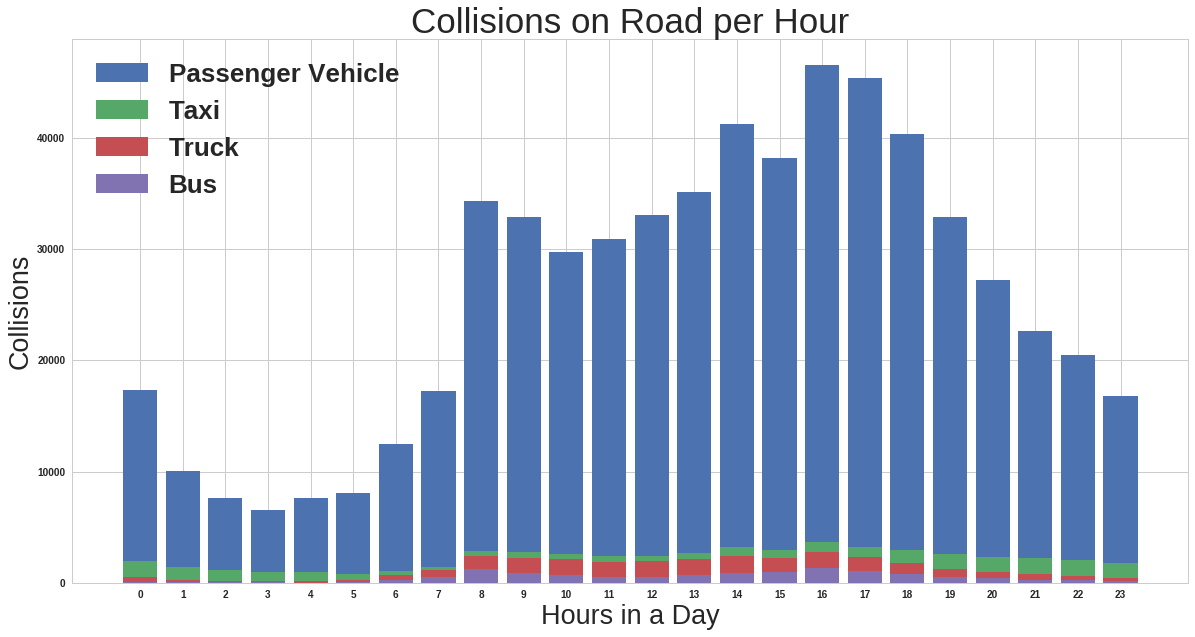

In [62]:
querystr = '''select count(*) as count, hour(time), VEHICLE_TYPE_CODE_1 from ACCIDENT_DATA
where time IS NOT NULL AND time<>" " and VEHICLE_TYPE_CODE_1 = "BUS" or VEHICLE_TYPE_CODE_1 = "TAXI" or VEHICLE_TYPE_CODE_1 = "PASSENGER VEHICLE" or VEHICLE_TYPE_CODE_1 LIKE "%TRUCK"
group by hour(time), VEHICLE_TYPE_CODE_1
order by hour(time) asc;
'''
cur = db.cursor()
cur.execute(querystr)

querystr1 = '''select count(*) as count, hour(time), VEHICLE_TYPE_CODE_1 from ACCIDENT_DATA
where time IS NOT NULL AND time<>" " and VEHICLE_TYPE_CODE_1 LIKE "%TRUCK"
group by hour(time), VEHICLE_TYPE_CODE_1
order by hour(time) asc;'''
cur1 = db.cursor()
cur1.execute(querystr1)

truck = [0]*24
for row in cur1.fetchall():
    truck[row[1]] += row[0]

    

bus = []
vehicle = []
taxi = []
for row in cur.fetchall():
    cnt = 0
    if row[2] == "BUS":
        bus.append(row[0])
    elif row[2] == "PASSENGER VEHICLE":
        vehicle.append(row[0])
    elif row[2] == "TAXI":
        taxi.append(row[0])


X = list(range(24))
fig=plt.figure(figsize=[20,10])
p4 = plt.bar(X, vehicle, bottom = bus)
p1 = plt.bar(X, taxi, bottom = bus)
p2 = plt.bar(X, truck, bottom = bus)
p3 = plt.bar(X, bus)
plt.legend((p4[0],p1[0],p2[0],p3[0]), ("Passenger Vehicle","Taxi","Truck","Bus"),prop={'size': 26}, loc="best")
# plt.legend((p1[0],p2[0],p3[0]), ("Taxi","Truck","Bus"),prop={'size': 26}, loc="best")
plt.xlabel("Hours in a Day", size=27)
plt.ylabel("Collisions", size=27)
plt.title('Collisions on Road per Hour', size=35)
plt.xticks(X)
plt.show()

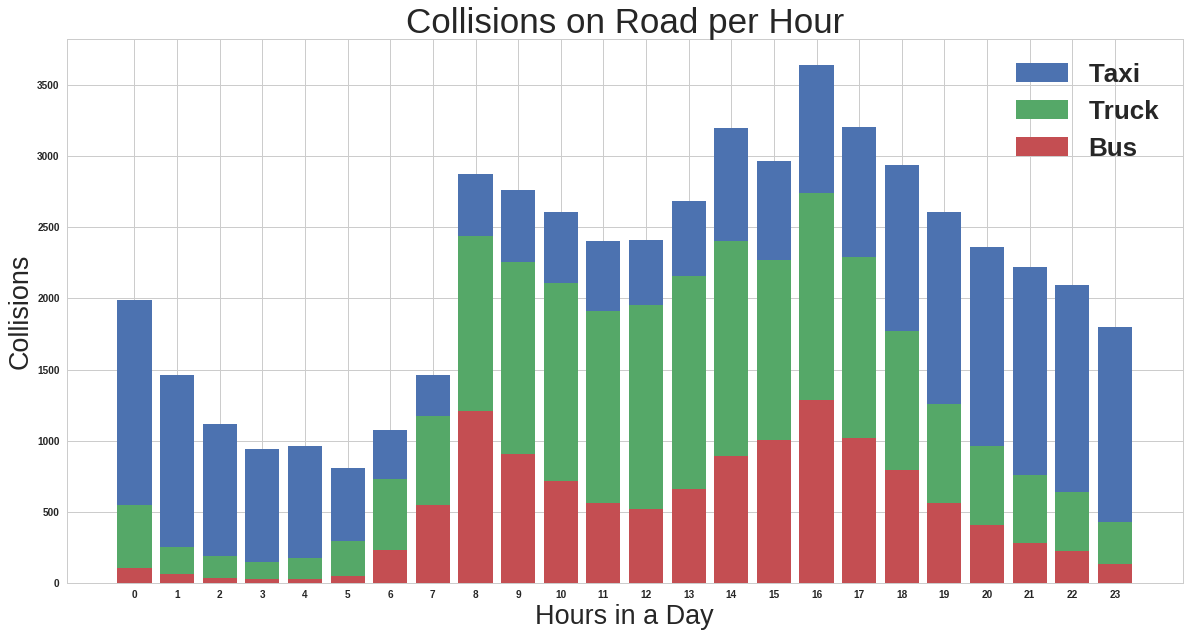

In [64]:
querystr = '''select count(*) as count, hour(time), VEHICLE_TYPE_CODE_1 from ACCIDENT_DATA
where time IS NOT NULL AND time<>" " and VEHICLE_TYPE_CODE_1 = "BUS" or VEHICLE_TYPE_CODE_1 = "TAXI" or VEHICLE_TYPE_CODE_1 = "PASSENGER VEHICLE" or VEHICLE_TYPE_CODE_1 LIKE "%TRUCK"
group by hour(time), VEHICLE_TYPE_CODE_1
order by hour(time) asc;
'''
cur = db.cursor()
cur.execute(querystr)

querystr1 = '''select count(*) as count, hour(time), VEHICLE_TYPE_CODE_1 from ACCIDENT_DATA
where time IS NOT NULL AND time<>" " and VEHICLE_TYPE_CODE_1 LIKE "%TRUCK"
group by hour(time), VEHICLE_TYPE_CODE_1
order by hour(time) asc;'''
cur1 = db.cursor()
cur1.execute(querystr1)

truck = [0]*24
for row in cur1.fetchall():
    truck[row[1]] += row[0]

    

bus = []
vehicle = []
taxi = []
for row in cur.fetchall():
    cnt = 0
    if row[2] == "BUS":
        bus.append(row[0])
    elif row[2] == "PASSENGER VEHICLE":
        vehicle.append(row[0])
    elif row[2] == "TAXI":
        taxi.append(row[0])


X = list(range(24))
fig=plt.figure(figsize=[20,10])
# p4 = plt.bar(X, vehicle, bottom = bus)
p1 = plt.bar(X, taxi, bottom = bus)
p2 = plt.bar(X, truck, bottom = bus)
p3 = plt.bar(X, bus)
# plt.legend((p4[0],p1[0],p2[0],p3[0]), ("Passenger Vehicle","Taxi","Truck","Bus"),prop={'size': 26}, loc="best")
plt.legend((p1[0],p2[0],p3[0]), ("Taxi","Truck","Bus"),prop={'size': 26}, loc="best")
plt.xlabel("Hours in a Day", size=27)
plt.ylabel("Collisions", size=27)
plt.title('Collisions on Road per Hour', size=35)
plt.xticks(X)
plt.show()

In [129]:
# Category of Vehicle responsible for maximum Collisions
querystr = '''select count(*) as count, hour(time) from ACCIDENT_DATA
where time IS NOT NULL AND time<>" "
group by hour(time) 
order by hour(time) asc;
'''
cur = db.cursor()
cur.execute(querystr)

hour = []
count = []
for row in cur.fetchall():
    hour.append(row[1])
    count.append(row[0])
    
# print(hour)
print(count)

[28126, 16391, 12504, 10684, 12461, 13612, 21340, 29403, 59509, 58381, 53965, 55769, 58833, 62272, 71799, 65130, 78955, 76133, 66545, 54205, 44870, 37145, 33482, 27059]


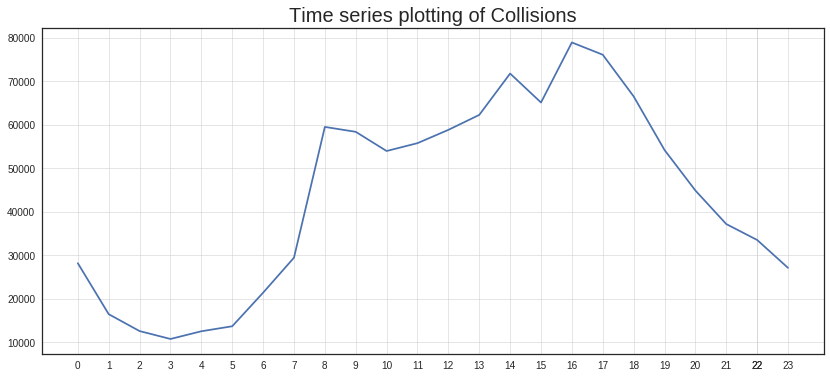

In [123]:
a = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,22,23]
fig=plt.figure(figsize=[14,6])
plt.plot(hour, count)
plt.xticks(a)
plt.grid(linestyle='-', linewidth=0.5)
plt.title('Time series plotting of Collisions', size = 20)
plt.show()

In [124]:
querystr = '''select count(*) as count, hour(time), dayname(dates) as days from ACCIDENT_DATA
where time IS NOT NULL AND time<>" "
group by hour(time), dayname(dates)
order by hour(time) asc;'''
cur = db.cursor()
cur.execute(querystr)

168

In [125]:
mon = []
tue = []
wed = []
thur = []
fri = []
sat = []
sun = []
for row in cur.fetchall():
    if row[-1] == "Monday":
        mon.append(row[0])
    elif row[-1] == "Tuesday":
        tue.append(row[0])
    elif row[-1] == "Wednesday":
        wed.append(row[0])
    elif row[-1] == "Thursday":
        thur.append(row[0])
    elif row[-1] == "Friday":
        fri.append(row[0])
    elif row[-1] == "Saturday":
        sat.append(row[0])
    elif row[-1] == "Sunday":
        sun.append(row[0])

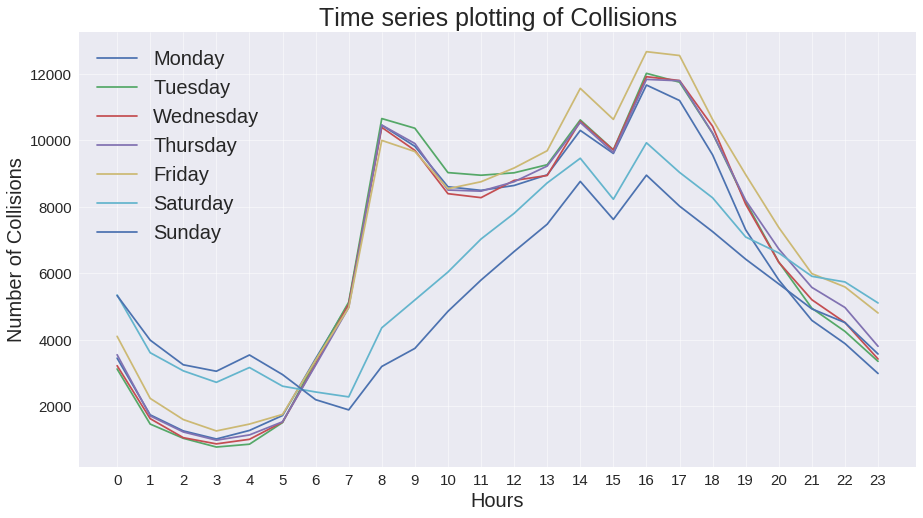

In [70]:
a = list(range(24))
# a = [0,3,6,9,12,15,18,21,23]
fig=plt.figure(figsize=[15,8])
plt.plot(a, mon, label = "Monday")
plt.plot(a, tue, label = "Tuesday")
plt.plot(a, wed, label = "Wednesday")
plt.plot(a, thur, label = "Thursday")
plt.plot(a, fri, label = "Friday")
plt.plot(a, sat, label = "Saturday")
plt.plot(a, sun, label = "Sunday")
plt.xlabel('Hours', size = 20)
plt.ylabel('Number of Collisions', size = 20)
plt.xticks(a, size = 15)
plt.yticks(size = 15)
plt.grid(linestyle='-', linewidth=0.5)
plt.title('Time series plotting of Collisions', size = 25)
plt.legend(prop={'size': 20})
plt.show()

In [130]:
querystr = '''select sum(HOURLY_PRECIP) as s,hour(date) from WEATHER_DATA group by hour(date) order by hour(date) asc;'''
cur = db.cursor()
cur.execute(querystr)

hour_w = []
count_w = []
for row in cur.fetchall():
    hour_w.append(row[1])
    count_w.append(row[0])
    
print(count_w)

[7.079999992623925, 7.19000000692904, 8.659999979659915, 10.099999945610762, 8.169999953359365, 5.08999995701015, 5.619999997317791, 6.129999972879887, 6.509999971836805, 6.699999999254942, 6.150000000372529, 7.379999963566661, 9.59999993443489, 6.949999921023846, 4.789999946951866, 11.499999962747097, 15.019999966025352, 10.729999989271164, 4.869999958202243, 6.729999989271164, 6.69000000692904, 8.739999948069453, 4.499999988824129, 3.749999960884452]


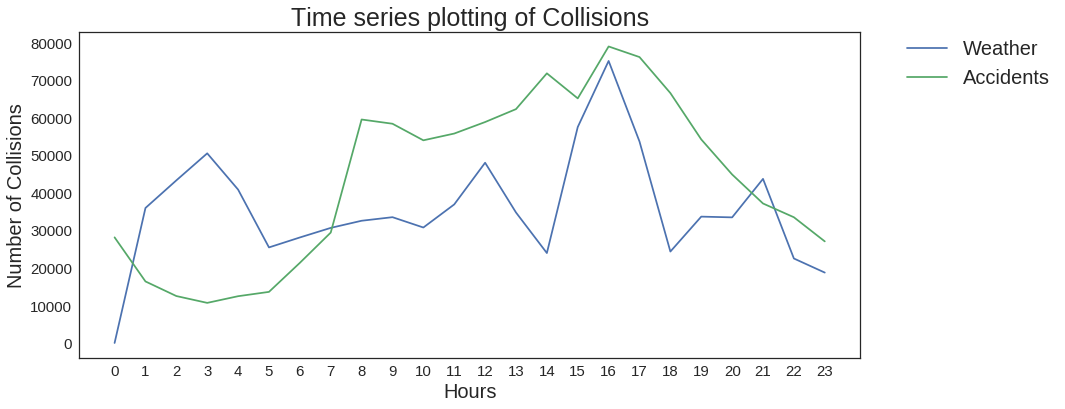

In [131]:
a = list(range(24))
fig=plt.figure(figsize=[14,6])
for i in range(1,len(count_w)):
    count_w[i] = count_w[i]*5000
plt.plot(hour_w, count_w, label = 'Weather')
plt.plot(hour,count, label = 'Accidents')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., prop={'size': 20})
plt.xticks(a, size = 15)
plt.yticks(size = 15)
plt.xlabel('Hours', size = 20)
plt.ylabel('Number of Collisions', size = 20)
plt.title('Time series plotting of Collisions', size = 25)
plt.show()

ValueError: 'label' must be of length 'x'

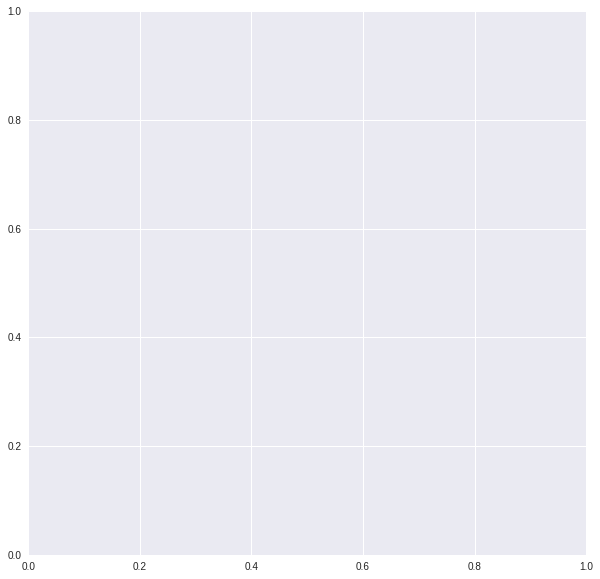

In [76]:
# Category of Vehicle responsible for maximum Collisions
labels = ['BROADWAY ','ATLANTIC AVENUE', 'NORTHERN BOULEVARD', '3 AVENUE ', 'FLATBUSH AVENUE', 'QUEENS BOULEVARD', 'LINDEN BOULEVARD', '2 AVENUE ', 'BRUCKNER BOULEVARD ', '5 AVENUE']
sizes = count
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','red','blue','black','green','violet','pink']
explode = (0.1, 0, 0, 0,0,0,0,0,0,0)  # explode 1st slice
fig=plt.figure(figsize=[10,10]) 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

In [11]:
querystr = "SELECT LATITUDE,LONGITUDE,BOROUGH,NUMBER_OF_PERSONS_KILLED FROM ACCIDENT_DATA WHERE BOROUGH IS NOT NULL and BOROUGH <> '' and NUMBER_OF_PERSONS_KILLED <> 0"
cur = db.cursor()
cur.execute(querystr)

770

In [12]:
lat11 = [] 
lon11 = []
lat22 = []
lon22 = []
lat33 = []
lon33 = []
lat44 = []
lon44 = []
lat55 = []
lon55 = []
for row in cur.fetchall():
    if row[2] == 'MANHATTAN':
        lat11.append(row[0])
        lon11.append(row[1])
    elif row[2] == 'BROOKLYN':
        lat22.append(row[0])
        lon22.append(row[1])
    elif row[2] == 'BRONX':
        lat33.append(row[0])
        lon33.append(row[1])
    elif row[2] == 'QUEENS':
        lat44.append(row[0])
        lon44.append(row[1])
    else:
        lat55.append(row[0])
        lon55.append(row[1])

In [13]:
querystr = "SELECT LATITUDE,LONGITUDE,BOROUGH FROM ACCIDENT_DATA WHERE BOROUGH IS NOT NULL and BOROUGH <> '' and NUMBER_OF_PERSONS_INJURED <> 0"
cur = db.cursor()
cur.execute(querystr)

138954

In [14]:
lat1_1 = [] 
lon1_1 = []
lat2_2 = []
lon2_2 = []
lat3_3 = []
lon3_3 = []
lat4_4 = []
lon4_4 = []
lat5_5 = []
lon5_5 = []
for row in cur.fetchall():
    if row[2] == 'MANHATTAN':
        lat1_1.append(row[0])
        lon1_1.append(row[1])
    elif row[2] == 'BROOKLYN':
        lat2_2.append(row[0])
        lon2_2.append(row[1])
    elif row[2] == 'BRONX':
        lat3_3.append(row[0])
        lon3_3.append(row[1])
    elif row[2] == 'QUEENS':
        lat4_4.append(row[0])
        lon4_4.append(row[1])
    else:
        lat5_5.append(row[0])
        lon5_5.append(row[1])

In [16]:
labels = ['BRONX', 'BROOKLYN', 'MANHATTAN', 'QUEENS', 'STATEN ISLAND']
person_killed = {}
accidents = {}
person_injured = {}
for borough in labels:
    if borough == 'MANHATTAN':
        person_killed[borough] = [lat11, lon11]
        person_injured[borough] = [lat1_1,lon1_1]
    elif borough == 'BROOKLYN':
        person_killed[borough] = [lat22,lon22]
        person_injured[borough] = lat2_2,lon2_2
    elif borough == 'BRONX':
        person_killed[borough] = [lat33,lon33]
        person_injured[borough] = [lat3_3,lon3_3]
    elif borough == 'QUEENS':
        person_killed[borough] = [lat44,lon44]
        person_injured[borough] = [lat4_4,lon4_4]
    else:
        person_killed[borough] = [lat55,lon55]
        person_injured[borough] = [lat5_5,lon5_5]

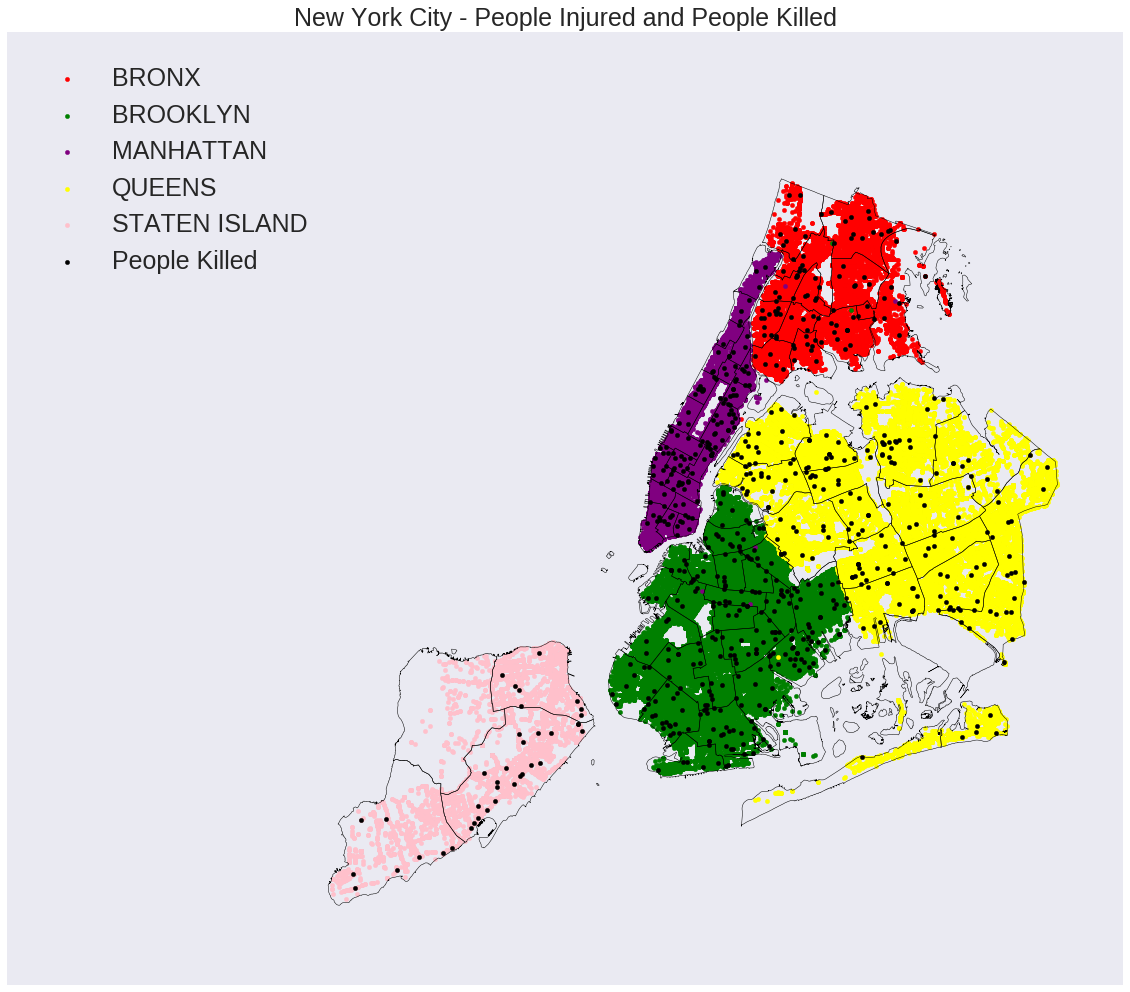

In [21]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=[20,20])
m = Basemap(projection='merc',llcrnrlat=40.45,urcrnrlat=41.00,\
        llcrnrlon=-74.50,urcrnrlon=-73.650,lat_ts=20,resolution='c')
m.readshapefile('./geo_export_52a6145a-a055-49fb-ac35-560dd2c5f3e0','new york')

color = ['#F1948A','#85C1E9','#82E0AA','#F9E79F','#EDBB99']
colors = ['red','green','purple','yellow','pink']
i = 0

for key, value in person_injured.items():
    x,y = m(value[1],value[0])
    plt.scatter(x,y,c=colors[i],marker ='o',s=20, label = key)
    i = i + 1

for key, value in person_killed.items():
    x,y = m(value[1],value[0])
    if key == 'STATEN ISLAND':
        a = plt.scatter(x,y,c='#000000',marker ='o',s=20, label = 'People Killed')
    else:
        a = plt.scatter(x,y,c='#000000',marker ='o',s=20)

plt.legend(loc=2, borderaxespad=1.,shadow=True, fancybox=True, fontsize = 25)
plt.title("New York City - People Injured and People Killed", size = 25)
plt.show()

In [40]:
import plotly.plotly as py
import plotly.graph_objs as go

import squarify

x = 0.
y = 0.
width = 100.
height = 100.

values = [500, 433, 78, 25, 25, 7]

normed = squarify.normalize_sizes(values, width, height)
rects = squarify.squarify(normed, x, y, width, height)

# Choose colors from http://colorbrewer2.org/ under "Export"
color_brewer = ['rgb(166,206,227)','rgb(31,120,180)','rgb(178,223,138)',
                'rgb(51,160,44)','rgb(251,154,153)','rgb(227,26,28)']
shapes = []
annotations = []
counter = 0

for r in rects:
    shapes.append( 
        dict(
            type = 'rect', 
            x0 = r['x'], 
            y0 = r['y'], 
            x1 = r['x']+r['dx'], 
            y1 = r['y']+r['dy'],
            line = dict( width = 2 ),
            fillcolor = color_brewer[counter]
        ) 
    )
    annotations.append(
        dict(
            x = r['x']+(r['dx']/2),
            y = r['y']+(r['dy']/2),
            text = values[counter],
            showarrow = False
        )
    )
    counter = counter + 1
    if counter >= len(color_brewer):
        counter = 0

# For hover text
trace0 = go.Scatter(
    x = [ r['x']+(r['dx']/2) for r in rects ], 
    y = [ r['y']+(r['dy']/2) for r in rects ],
    text = [ str(v) for v in values ], 
    mode = 'text',
)
        
layout = dict(
    height=700, 
    width=700,
    xaxis=dict(showgrid=False,zeroline=False),
    yaxis=dict(showgrid=False,zeroline=False),
    shapes=shapes,
    annotations=annotations,
    hovermode='closest'
)

# With hovertext
figure = dict(data=[trace0], layout=layout)

# Without hovertext
#figure = dict(data=[Scatter()], layout=layout)

py.iplot(figure, filename='squarify-treemap')

Aw, snap! We don't have an account for ''. Want to try again? You can authenticate with your email address or username. Sign in is not case sensitive.

Don't have an account? plot.ly

Questions? support@plot.ly


PlotlyError: Because you didn't supply a 'file_id' in the call, we're assuming you're trying to snag a figure from a url. You supplied the url, '', we expected it to start with 'https://plot.ly'.
Run help on this function for more information.

In [41]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import squarify

# qualtities plotted
# squarre area is the town surface area (superf)
# color scale is the town population in 2011 (p11_pop)

# read data from csv file
# data from CAPP opendata http://opendata.agglo-pau.fr/index.php/fiche?idQ=27
df = pd.read_csv("Evolution_et_structure_de_la_population/Evolution_structure_population.csv", sep=";")
df = df.set_index("libgeo")
df = df[["superf", "p11_pop"]]
df2 = df.sort_values(by="superf", ascending=False)

# treemap parameters
x = 0.
y = 0.
width = 100.
height = 100.
cmap = matplotlib.cm.viridis

# color scale on the population
# min and max values without Pau
mini, maxi = df2.drop("PAU").p11_pop.min(), df2.drop("PAU").p11_pop.max()
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in df2.p11_pop]
colors[1] = "#FBFCFE"

# labels for squares
labels = ["%s\n%d km2\n%d hab" % (label) for label in zip(df2.index, df2.superf, df2.p11_pop)]
labels[11] = "MAZERES-\nLEZONS\n%d km2\n%d hab" % (df2["superf"]["MAZERES-LEZONS"], df2["p11_pop"]["MAZERES-LEZONS"])

# make plot
fig = plt.figure(figsize=(12, 10))
fig.suptitle("Population et superficie des communes de la CAPP", fontsize=20)
ax = fig.add_subplot(111, aspect="equal")
ax = squarify.plot(df2.superf, color=colors, label=labels, ax=ax, alpha=.7)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title("L'aire de chaque carré est proportionnelle à la superficie de la commune\n", fontsize=14)

# color bar
# create dummy invisible image with a color map
img = plt.imshow([df2.p11_pop], cmap=cmap)
img.set_visible(False)
fig.colorbar(img, orientation="vertical", shrink=.96)

fig.text(.76, .9, "Population", fontsize=14)
fig.text(.5, 0.1,
         "Superficie totale %d km2, Population de la CAPP : %d hab" % (df2.superf.sum(), df2.p11_pop.sum()),
         fontsize=14,
         ha="center")
fig.text(.5, 0.07,
         "Source : http://opendata.agglo-pau.fr/",
         fontsize=14,
         ha="center")

plt.show()

FileNotFoundError: File b'Evolution_et_structure_de_la_population/Evolution_structure_population.csv' does not exist